In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [22]:
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

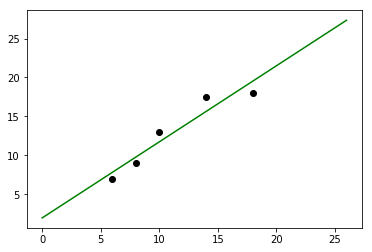

coefficient of determination:0.91


In [23]:
# 简单线性回归
model = LinearRegression()
model.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = model.predict(xx.reshape(-1, 1))
plt.scatter(x=X_train, y=y_train, color='k')
plt.plot(xx, yy, '-g')
plt.show()
score = model.score(X_train,y_train)
print('coefficient of determination:{:.2f}'.format(score))

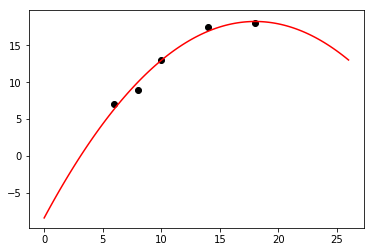

coefficient of determination:0.98


In [24]:
# 多项式回归
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.fit_transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_quadratic, y_train)
xx2 = quadratic_featurizer.fit_transform(xx.reshape(-1,1))
yy2 = model2.predict(xx2)
plt.plot(xx, yy2, '-r')
plt.scatter(x=X_train, y=y_train, color='k')
plt.show()
score = model2.score(X_train_quadratic,y_train)
print('coefficient of determination:{:.2f}'.format(score))

In [25]:
X2 = sm.add_constant(X_train_quadratic)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     53.47
Date:                Sat, 21 Mar 2020   Prob (F-statistic):             0.0184
Time:                        20:23:53   Log-Likelihood:                -4.5188
No. Observations:                   5   AIC:                             15.04
Df Residuals:                       2   BIC:                             13.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3977      3.892     -2.158      0.1

c:\users\yjh\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [26]:
print('X_train:\n', X_train)
print('X_train_quadratic:\n', X_train_quadratic)
print('X_test:\n', X_test)
print('X_test_quadratic:\n', X_test_quadratic)
print('简单线性回归R2：', model.score(X_test, y_test))
print('二次回归R2：', model2.score(X_test_quadratic, y_test));

X_train:
 [[6], [8], [10], [14], [18]]
X_train_quadratic:
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
X_test:
 [[6], [8], [11], [16]]
X_test_quadratic:
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
简单线性回归R2： 0.809726797707665
二次回归R2： 0.8675443656345054


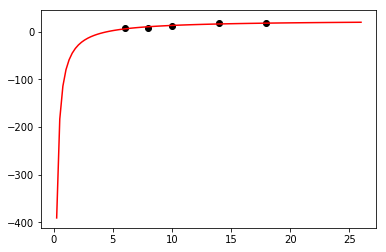

coefficient of determination:0.95


In [27]:
# 反比例函数回归
X_train_transformed = 1/np.array(X_train)
model3 = LinearRegression()
model3.fit(X_train_transformed, y_train)
xx2 = 1/xx[1:]
yy2 = model3.predict(xx2.reshape(-1,1))
plt.plot(xx[1:], yy2, '-r')
plt.scatter(x=X_train, y=y_train, color='k')
plt.show()
score = model3.score(X_train_transformed,y_train)
print('coefficient of determination:{:.2f}'.format(score))

In [28]:
X2 = sm.add_constant(X_train_transformed)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     58.98
Date:                Sat, 21 Mar 2020   Prob (F-statistic):            0.00459
Time:                        20:23:53   Log-Likelihood:                -6.9424
No. Observations:                   5   AIC:                             17.88
Df Residuals:                       3   BIC:                             17.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2020      1.575     15.371      0.0

c:\users\yjh\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


对于非线性回归，首先观察散点的形状，设计一种函数取拟合。  
如果是二次或者三次函数，直接用PolynomialFeatures方法进行转换。  
如果是其他类型的函数，手动转换一下看看效果如何，例如反比例函数。